## Calculo do drawdown

R. Freire [freire.ch](https://freire.ch).

Licença [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)

Usamos simulação de Monte Carlo para estimar o drawdown médio e máximo (definido como o dd que ocorre 5% dos casos) para uma estratégia.

Da série histórica, que está no arquivo trades2.csv (basta colocar os resultados em um arquivo .csv em uma coluna chamada "results") extraímos a taxa de acerto (winrate) e a razão retorno:risco (rr). Usaremos apenas essas duas informações na simulação.

Na simulação: sorteamos números (pseudo)aleatórios entre 0 e 1; se for menor que winrate o temos um resultado de gain rr; caso contrário, temos uma perda de uma unidade (-1).

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

file_data = "trades2.csv"
trades = pd.read_csv(file_data)

In [155]:
cumulativo = trades.results.cumsum()

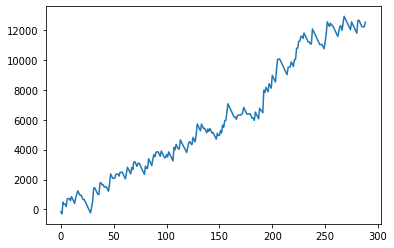

In [156]:
plt.plot(cumulativo)

In [157]:
loss = pd.DataFrame(list(filter(lambda x: x <= 0, trades.results)))
gain = pd.DataFrame(list(filter(lambda x: x > 0, trades.results)))

winrate = round((len(gain)/(len(gain)+len(loss))),2)
lossrate = 1 - acerto

rr = round(-gain.mean()/loss.mean(),2)[0]

In [158]:
montecarlo = [[rr if np.random.uniform(0,1,100)[j] <= winrate else -1 for j in range(1,99)] for i in range(1,1000)]


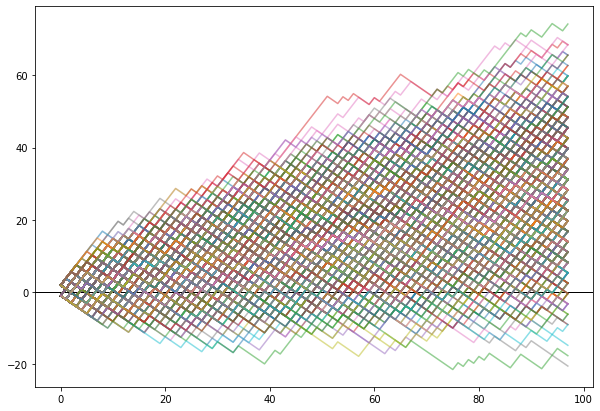

In [159]:
result = pd.DataFrame(montecarlo).transpose()


plt.subplots(figsize=(10,7))
plt.axhline(y=0,linewidth=1, color='#000000')
plt.plot(result.cumsum(), alpha = 0.5)
plt.show()

In [160]:
drawdown = result.cumsum() - result.cumsum().cummax()
maxdd = -drawdown.min()

**Drawdown Médio**

In [161]:
maxdd.mean()

8.472362362362361

**Drawdown Máximo**

In [162]:
maxdd.quantile(.95)

15.048999999999987